## Stock Price Predictor

In [1]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock = input('Enter the code of the Stock: ')
data = yf.download(stock, "2008-01-01", "2021-11-27", auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,843.200012,843.200012,843.200012,834.900024,4
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4


In [3]:
data.shape

(3472, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3472 entries, 2007-12-31 to 2021-11-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3472 non-null   float64
 1   High    3472 non-null   float64
 2   Low     3472 non-null   float64
 3   Close   3472 non-null   float64
 4   Volume  3472 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 162.8 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000
mean,1346.085628,1353.276037,1338.214516,1345.836780,5466.944988
std,279.768934,281.004249,278.400947,279.820950,29219.914127
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1192.574982,1197.875031,1186.250031,1193.149963,43.000000
50%,1292.099976,1296.549988,1286.799988,1292.549988,141.000000
75%,1569.300049,1577.199982,1557.550049,1567.100006,457.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,386334.000000


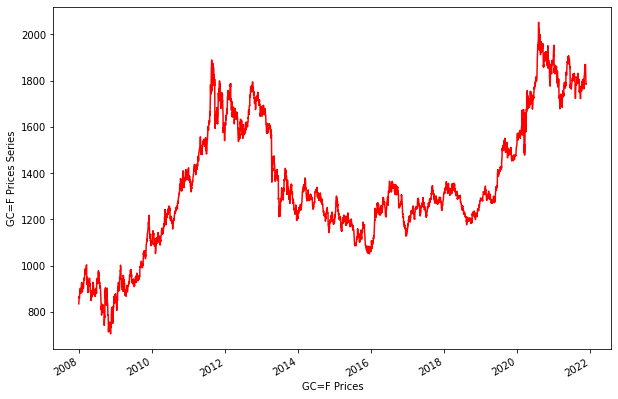

In [6]:
data.Close.plot(figsize=(10,7), color='r')
plt.xlabel(f"{stock} Prices")
plt.ylabel(f"{stock} Prices Series")
plt.show()

<AxesSubplot:xlabel='Open', ylabel='Density'>

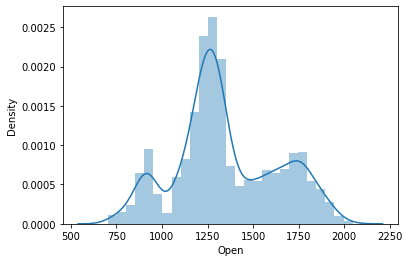

In [7]:
sns.distplot(data.Open)

<AxesSubplot:xlabel='High', ylabel='Density'>

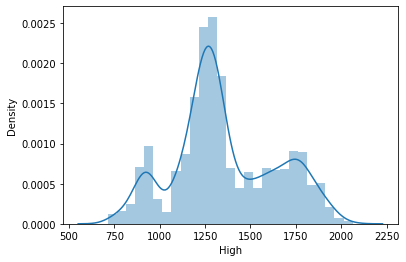

In [8]:
sns.distplot(data.High)

<AxesSubplot:xlabel='Low', ylabel='Density'>

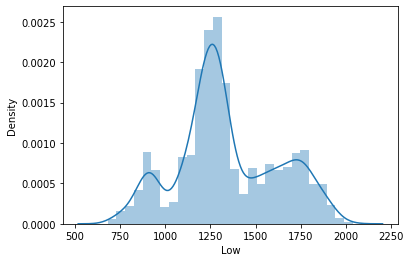

In [9]:
sns.distplot(data.Low)

<AxesSubplot:xlabel='Close', ylabel='Density'>

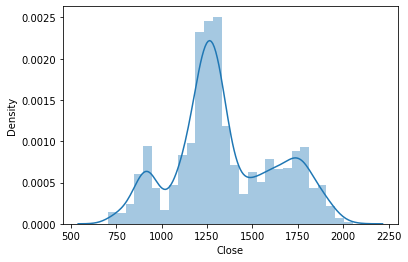

In [10]:
sns.distplot(data.Close)

### Conlusions
- Shape the of the data
- How our data is distributed
- It's is very very non-linear 

In [11]:
X = data.drop('Close', axis = 1)
y = data['Close']
y

Date
2007-12-31     834.900024
2008-01-02     857.000000
2008-01-03     866.400024
2008-01-04     863.099976
2008-01-07     859.599976
                 ...     
2021-11-18    1861.000000
2021-11-19    1851.199951
2021-11-22    1806.000000
2021-11-23    1783.500000
2021-11-24    1784.099976
Name: Close, Length: 3472, dtype: float64

## Training and Testing Dataset

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [13]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(2777, 4) (695, 4) (2777,) (695,)


## Modeling Part

In [14]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)

In [15]:
# Predict value print
pred

array([ 860.7886474 , 1296.7794433 , 1477.59805189, 1148.33883581,
       1309.61089633, 1503.14687159, 1410.1983535 , 1656.70919586,
       1658.49121741, 1168.62932228, 1274.35437372, 1527.72576511,
       1237.41722108, 1204.07123594,  981.47705427, 1070.26394939,
       1104.02501336, 1306.39578976,  752.47457524, 1625.20608453,
       1215.30984931, 1718.99601715,  823.10982702, 1241.02467856,
       1292.52940144,  791.07092195, 1348.53268966, 1723.62095686,
       1973.60694549, 1629.50964615, 1277.65771771, 1944.87908718,
        902.3433905 , 1533.38809959,  932.62411641,  978.5232285 ,
       1230.28807498, 1583.18186014, 1426.03681972, 1657.32292814,
       1827.07221602, 1221.97292273, 1253.70224781, 1278.32564927,
        919.97881548, 1546.25977767, 1319.32933862, 1196.73972671,
       1342.32947724, 1253.94472861, 1171.28236226, 1133.27860666,
       1696.68036506, 1774.44417537, 1653.26973519, 1888.58050312,
       1258.89217989, 1326.32578186, 1592.40841228, 1235.17305

In [16]:
# MSE (Mean Square Error)
# RMSE (Root Mean Square Error)
# r2_square --> 1.0 -> Very Good Model

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    '''
        y_test: ground truth
        y_pred: model predict value
    '''
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)
    print('*'*50)
    print(f"*  Mean Square Error: {mse}")
    print(f"*  Root Mean Square Error: {rmse}")
    print(f"*  r2_score: {r2_scores}")
    print('*'*50)

calculate_metrics(y_test, pred)

**************************************************
*  Mean Square Error: 30.603609421197696
*  Root Mean Square Error: 5.532052912002713
*  r2_score: 0.9996200981240283
**************************************************


### Lasso and Ridge Model

In [17]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso().fit(X_train, y_train)
model_ridge = Ridge().fit(X_train, y_train)

model_lasso_pred = model_lasso.predict(X_test)
model_ridge_pred = model_ridge.predict(X_test)

In [18]:
calculate_metrics(y_test, model_lasso_pred)

calculate_metrics(y_test, model_ridge_pred)

**************************************************
*  Mean Square Error: 60.07663515535179
*  Root Mean Square Error: 7.750911891858389
*  r2_score: 0.9992542308953343
**************************************************
**************************************************
*  Mean Square Error: 30.603630749258734
*  Root Mean Square Error: 5.532054839682877
*  r2_score: 0.9996200978592696
**************************************************


## Support Vector Machine Regression

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

params_grid = GridSearchCV(SVR(), params, refit=True, verbose=3)
params_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.056 total time=   3.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.040 total time=   4.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.020 total time=   4.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.018 total time=   4.9s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.051 total time=   5.8s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.056 total time=   4.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.040 total time=   5.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.020 total time=   3.8s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.018 total time=   5.8s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.051 total time=   4.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.056 total time=   3.9s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [20]:
model_svr = SVR(C=10, gamma=0.1, kernel='rbf')
model_svr.fit(X_train, y_train)
svr_pred = model_svr.predict(X_test)

## Model Save

In [25]:
import joblib  

joblib.dump(model_ridge, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")